In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./Train/Train.csv")

In [3]:
dataset.shape

(40000, 2)

<b>We have 40,000 reviews in our dataset.

In [4]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [5]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

<b>This shows that we've a balanced dataset containing almost equal number of both Positive and Negative reviews.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
y = dataset['label'].values

In [8]:
y = le.fit_transform(y)

In [9]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

<b>Converted pos to 1 and neg to 0

In [10]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

<b>We can see that the reviews in the dataset are not clean and have some extra characters which are not actually part of the original review like </br/>, IAMASEAL2@YAHOO.COM etc

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [13]:
def clean_text(sample):
    sample = sample.lower()
    #removing all <br> tags in the review
    sample = sample.replace("<br /><br />", "")
    #removing all special characters from the review
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw] # list comprehension
    
    sample = " ".join(sample)
    
    return sample

<b>BEFORE CLEANING

In [14]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

<B>AFTER CLEANING

In [15]:
clean_text(dataset['review'][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [16]:
dataset['cleaned_review'] =  dataset['review'].apply(clean_text)

In [17]:
corpus = dataset['cleaned_review'].values

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [19]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [20]:
X = cv.fit_transform(corpus)

In [21]:
print(X[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [22]:
tfidf = TfidfTransformer()

In [23]:
X = tfidf.fit_transform(X)

In [24]:
print(X[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [25]:
X.shape

(40000, 50000)

In [26]:
type(X)

scipy.sparse.csr.csr_matrix

In [27]:
y.shape

(40000,)

## Neural Network

In [28]:
from keras import models
from keras.layers import Dense

In [29]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

<b>We use sigmoid function as it exists between (0 to 1). It is used for models where we have to predict the probability as an output. Probability of anything exists only between the range of 0 and 1. Since we're trying to predict whether a review is negative or positive, sigmoid is the right choice.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                800016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [32]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [33]:
X_train.shape, y_train.shape

((35000, 50000), (35000,))

In [34]:
type(X_val)

scipy.sparse.csr.csr_matrix

In [35]:
X_train.sort_indices()
X_val.sort_indices()

In [36]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=2, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/2
274/274 [==============================] - 6s 21ms/step - loss: 0.4394 - accuracy: 0.8627 - val_loss: 0.2676 - val_accuracy: 0.8940
Epoch 2/2
274/274 [==============================] - 4s 16ms/step - loss: 0.2100 - accuracy: 0.9182 - val_loss: 0.2490 - val_accuracy: 0.8956


In [37]:
result = hist.history

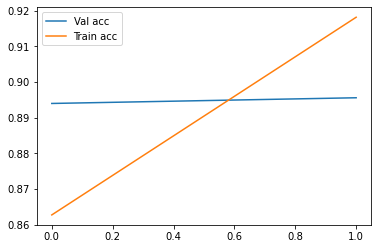

In [38]:
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

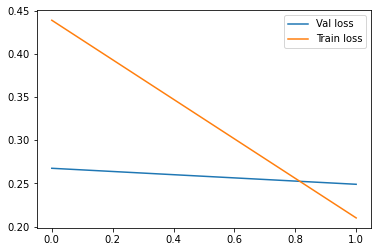

In [39]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [40]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.8956


[0.2490096241235733, 0.8956000208854675]

# Test Time

In [41]:
pos_neg = {0 : 'negative' , 1 : 'positive'}

In [42]:
def predictions(df):
    df['cleaned_review'] = df['review'].apply(clean_text)
    cleaned_reviews = df['cleaned_review']
    cleaned_reviews = cv.transform(cleaned_reviews)
    cleaned_reviews = tfidf.transform(cleaned_reviews)
    cleaned_reviews.sort_indices()
    pred = model.predict(cleaned_reviews)
    return pred

In [43]:
def review_classification(y_pred):
    print(y_pred)
    y_pred[ y_pred >= 0.5 ]  =  1
    review_class = y_pred.astype('int')
    review_class = [ pos_neg[p[0]] for p in review_class ]
    print(review_class)

In [44]:
string_input = input("Enter your review")
string_df = pd.DataFrame([string_input],columns=["review"])
y_pred = predictions(string_df)
review_classification(y_pred)

Enter your reviewThis movie was amazing
[[0.9828046]]
['positive']


# IGNORE THE CODE BELOW 

In [45]:
ids = np.arange(10000)

In [46]:
final_matrix = np.stack((ids, y_pred), axis =1)

ValueError: all input arrays must have the same shape

In [ ]:
df = pd.DataFrame(final_matrix, columns=['Id', 'label'])

In [ ]:
df.to_csv("y_pred.csv", index = False)

In [47]:
test = pd.read_csv("./Test/Test.csv")
print(predictions(test))

[[0.02922258]
 [0.02155483]
 [0.00335005]
 ...
 [0.99394226]
 [0.9939158 ]
 [0.00979191]]
